# Ergodic Mean Deviation Indicator

https://www.motivewave.com/studies/ergodic_mean_deviation_ind.htm

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.208736,271742800
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.617908,249616000
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.761467,133789600
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.019852,101701600
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.550922,102349600


In [3]:
n = 14 # Number of periods
ema = df['Adj Close'].ewm(span=n, adjust=False).mean()
emd = df['Adj Close'] - ema
df['EMD_AVG'] = emd.rolling(n).mean()

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMD_AVG
Date,,,,,,,
2018-08-20,54.525002,54.794998,53.777500,53.865002,51.729435,121150800,0.994050
2018-08-21,54.200001,54.297501,53.507500,53.759998,51.628605,104639200,1.073216
2018-08-22,53.525002,54.090000,53.459999,53.762501,51.631001,76072400,1.054741
2018-08-23,53.662498,54.262501,53.650002,53.872501,51.736645,75532800,1.036381
2018-08-24,54.150002,54.224998,53.777500,54.040001,51.897495,73905600,1.014432


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,EMD_AVG
Date,,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.375175,148676800,-2.297970
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.866352,234330000,-2.282705
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.620609,212468400,-2.255307
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.639885,169165600,-2.137450
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.003689,140014000,-2.029342


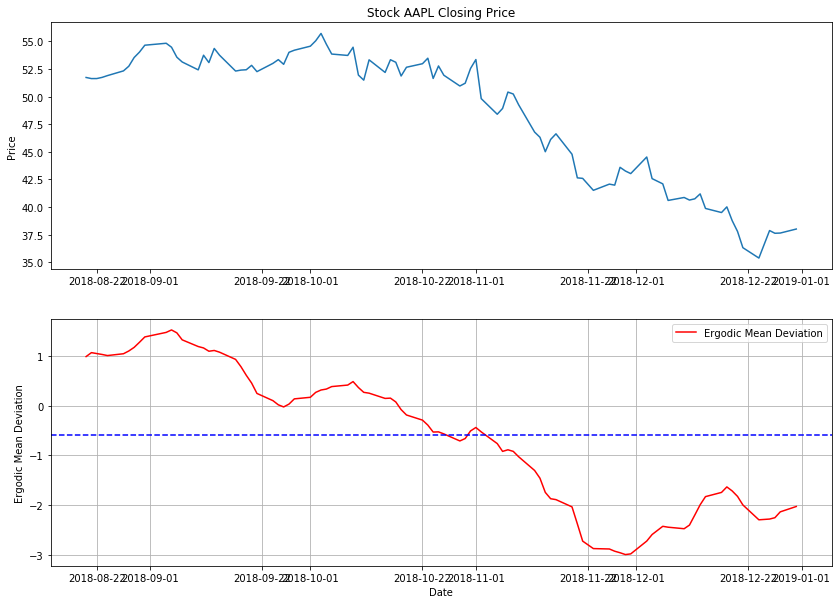

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['EMD_AVG'], label='Ergodic Mean Deviation', color='red')
ax2.axhline(df['EMD_AVG'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Ergodic Mean Deviation')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

### Candlestick with Relative Vigor Index

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EMD_AVG,VolumePositive
0,736926.0,54.525002,54.794998,53.777500,53.865002,51.729435,121150800,0.994050,False
1,736927.0,54.200001,54.297501,53.507500,53.759998,51.628605,104639200,1.073216,False
2,736928.0,53.525002,54.090000,53.459999,53.762501,51.631001,76072400,1.054741,False
3,736929.0,53.662498,54.262501,53.650002,53.872501,51.736645,75532800,1.036381,False
4,736930.0,54.150002,54.224998,53.777500,54.040001,51.897495,73905600,1.014432,False


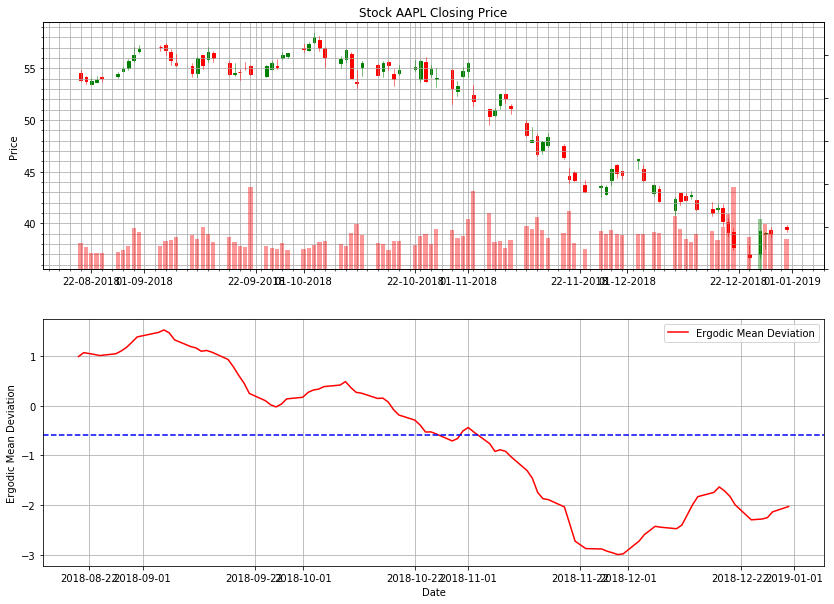

In [8]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['EMD_AVG'], label='Ergodic Mean Deviation', color='red')
ax2.axhline(df['EMD_AVG'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Ergodic Mean Deviation')
ax2.set_xlabel('Date')
ax2.legend(loc='best')